# Demo de implementación de un Algoritmo Genético (AG) para resolver el problema de encontrar un Máximo Óptimo definido al azar en un plano y tratando de esquivar los máximos locales aleatorios
Utiliza la librería DEAP disponible en https://deap.readthedocs.io/en/master/

0) Preparar el ambiente:

In [0]:
!pip install deap

1) Importar librerías:

In [0]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

from deap import base
from deap import creator
from deap import tools

print("\nLibrerías importadas")


Librerías importadas


2) Inicializar objetos de DEAP para utilizar e indicar Operadores Genéticos:

In [0]:
## Inicializa objeto Toolbox auxiliar
toolbox = base.Toolbox()

## OPERADORES GENÉTICOS
## (ver lista completa en https://deap.readthedocs.io/en/master/api/tools.html#operators )

# Registrar tipo de Selección a aplicar con sus parámetros
toolbox.register("select", tools.selTournament, tournsize=2)

# Registrar tipo de Cruzamiento a aplicar con sus parámetros
toolbox.register("mate", tools.cxTwoPoint)

# Registrar tipo de Mutación a aplicar con sus parámetros
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)

print("\nOperadores Genéticos definidos")


Operadores Genéticos definidos


3) Especificar Estructura del Cromosoma y Función de Aptitud:

In [0]:
## PARÁMETROS CONFIGURABLES PARA CROMOSOMA y FUNCIÓN DE APTITUD

# Cantidad de Máximos Locales
CANT_MAXIMOS_LOCALES = 3

# Espacio mínimo y máximp del espacio de búsqueda
MIN_ESPACIO_BUSQ = -1000
MAX_ESPACIO_BUSQ = 1000

print("\nParámetros  definidos")


Parámetros  definidos


In [0]:
### FUNCIÓN DE APTITUD

# indica que es la función de aptitud es para maximizar
creator.create("Fitness", base.Fitness, weights=(1.0,))

# Define Posiciones Random para Máximos Locales y Óptimos
# con Heurística también al Azar (entre -10 y 100)
POS_RANDOM_EVALUAR = []
VAL_RANDOM_EVALUAR = []
POS_RANDOM_EVALUAR_OPTIMO = 0
auxMejorVal = -99
print("** Posiciones Generadas al Azar: **")
for i in range(CANT_MAXIMOS_LOCALES+1):

    auxPos = ( round(random.uniform(MIN_ESPACIO_BUSQ, MAX_ESPACIO_BUSQ),3),  round(random.uniform(MIN_ESPACIO_BUSQ, MAX_ESPACIO_BUSQ),3) ) 
    auxVal = int(random.uniform(-10, 100))

    POS_RANDOM_EVALUAR.append( auxPos )
    VAL_RANDOM_EVALUAR.append( auxVal )
    
    print(" -->", auxPos, "{ ", auxVal, "} ")

    if VAL_RANDOM_EVALUAR[POS_RANDOM_EVALUAR_OPTIMO] < auxVal:
        POS_RANDOM_EVALUAR_OPTIMO = i

print("** Posición Máximo Óptimo a Buscar: ", POS_RANDOM_EVALUAR[POS_RANDOM_EVALUAR_OPTIMO], " { ",  VAL_RANDOM_EVALUAR[POS_RANDOM_EVALUAR_OPTIMO]," } **")

# definimos la función de aptitud a evaluar
def funcAptitud(individuo):

    devuelve = -10
    disPosMenor = MAX_ESPACIO_BUSQ
    for posi, vali in zip(POS_RANDOM_EVALUAR, VAL_RANDOM_EVALUAR):

          # calcula la distancia al punto del Individuo
          sqerrors = ((x - y)**2 for x, y in zip(individuo, posi))
          distPos =  math.fsum(sqerrors)**0.5 / 10
          
          # Si es la menor distancia calcula la Aptitud
          if disPosMenor > distPos:
              disPosMenor = distPos 
              devuelve = ( vali - distPos) 

    return devuelve,

    
# registra la función que se va a evaluar
toolbox.register("evaluate", funcAptitud)

print("\nFunción de Aptitud definida")

** Posiciones Generadas al Azar: **
 --> (-928.101, -603.252) {  80 } 
 --> (-956.439, 886.276) {  74 } 
 --> (-455.536, 680.377) {  73 } 
 --> (144.145, -230.776) {  99 } 
** Posición Máximo Óptimo a Buscar:  (144.145, -230.776)  {  99  } **

Función de Aptitud definida


In [0]:
### ESTRUCTURA DEL CROMOSOMA

# indica que los individuos son una lista de genes que aplica la función antes definida
creator.create("Individual", list, fitness=creator.Fitness)

# indica que los genes son float correspondiente a las posiciones
toolbox.register("attr_float", random.uniform, MIN_ESPACIO_BUSQ, MAX_ESPACIO_BUSQ) 

# registra el tipo de individuo y población a usar
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

print("\nCromosoma definido")


Cromosoma definido


4) Ejecutar la corrida del algoritmo mostrando resultados:

In [0]:
### Parámetros de la Corrida

# Cantidad de Ciclos de la Corrida
CANT_CICLOS = 200

# Cantidad de Individuos en la Población
CANT_INDIVIDUOS_POBLACION = 25

# Probabilidad del Cruzamiento (en AG 1 = 100%)
PROBAB_CRUZAMIENTO = 1 

# Probabilidad del Mutación 
PROBAB_MUTACION = 0.2

# Indica si se muestra el detalle de las estadísticas en cada ciclo
MUESTRA_ESTADISTICAS = True

print("\nParámetros de la Corrida definidos")


Parámetros de la Corrida definidos


In [0]:
## Define una función auxiliar para calcular estadísticas y guarda info en vectores auxiliares
def CalculoEstadisticas(ciclo, indivPobla, muestra):
    
    auxMax = indivPobla[0].fitness.values[0]
    auxMin = indivPobla[0].fitness.values[0]
    auxSum = indivPobla[0].fitness.values[0]
    auxBestInd = indivPobla[0]
    for ind in indivPobla[1:]:

        apt = ind.fitness.values[0]
        auxSum = auxSum + apt

        if apt > auxMax:
            auxMax = apt
            auxBestInd = ind

        if apt < auxMin:
            auxMin = apt

    auxProm = auxSum / len(indivPobla)

    if muestra:          
        print("\n-- Ciclo  %i --" % ciclo)
        print(" Mejor Individuo:", auxBestInd)
        print("   Max: ", auxMax, " / Promedio: ", round(auxProm,2), " / Min: ", auxMin)

    return auxBestInd, auxMax, auxProm, auxMin

print("\nFunción {CalculoEstadisticas} definida")   


Función {CalculoEstadisticas} definida


In [0]:
## EJECUCIÓN DE LA CORRIDA

# Define la población inicial
indivPobla = toolbox.population(n=CANT_INDIVIDUOS_POBLACION)

# Asigna el valor de aptitud a los individuos de la población inicial
fitnesses = list(map(toolbox.evaluate, indivPobla))
for ind, fit in zip(indivPobla, fitnesses):
    ind.fitness.values = fit

# vectores auxiliares 
ciclo = 1    
ciclosMaxIndiv = []
ciclosMaxAptitud = []
ciclosPromAptitud = []
ciclosMinAptitud = []

# Cálcula estadísticas y guarda info en vectores auxiliares
auxBestInd, auxMax, auxProm, auxMin = CalculoEstadisticas(0, indivPobla, MUESTRA_ESTADISTICAS)
ciclosMaxIndiv.append( auxBestInd )
ciclosMaxAptitud.append( auxMax )
ciclosPromAptitud.append( auxProm )
ciclosMinAptitud.append( auxMin )

        # criterio de paro
while (ciclo < CANT_CICLOS):

    # Realiza la Selección
    indivSelecc = toolbox.select(indivPobla, len(indivPobla))

    # Inicializa a los hijos clonando a los seleccionados
    indivHijos = list(map(toolbox.clone, indivSelecc))
    
    # Realiza el Cruzamiento
    for hijo1, hijo2 in zip(indivHijos[::2], indivHijos[1::2]):
        if random.random() < PROBAB_CRUZAMIENTO:
            toolbox.mate(hijo1, hijo2)
            del hijo1.fitness.values
            del hijo2.fitness.values

    # Realiza la Mutación
    for mutant in indivHijos:
        if random.random() < PROBAB_MUTACION:
            toolbox.mutate(mutant)
            del mutant.fitness.values
              
    # Evalua a los individuos que salen de la Mutación
    #  para determinar si son válidos y su valor de aptitud
    invalid_ind = [ind for ind in indivHijos if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    
    # Reemplaza la población actual con los hijos
    indivPobla[:] = indivHijos
    
    # Cálcula estadísticas y guarda info en vectores auxiliares
    auxBestInd, auxMax, auxProm, auxMin = CalculoEstadisticas(ciclo, indivPobla, MUESTRA_ESTADISTICAS)
    ciclosMaxIndiv.append( auxBestInd )
    ciclosMaxAptitud.append( auxMax )
    ciclosPromAptitud.append( auxProm )
    ciclosMinAptitud.append( auxMin )

    ciclo = ciclo + 1

print("\n-- Corrida Finalizada en %i ciclos --\n" % ciclo )

mejorCiclo = np.argmax( ciclosMaxAptitud )
print("** Posición Máximo Óptimo a Buscar: ", POS_RANDOM_EVALUAR[POS_RANDOM_EVALUAR_OPTIMO], " { ",  VAL_RANDOM_EVALUAR[POS_RANDOM_EVALUAR_OPTIMO]," } **")
mejorCiclo = np.argmax( ciclosMaxAptitud )
print("== Mejor Individuo de la Corrida:", ciclosMaxIndiv[mejorCiclo], " { ", ciclosMaxAptitud[mejorCiclo], " } generado en el ciclo ", mejorCiclo," ==")


-- Ciclo  0 --
 Mejor Individuo: [275.8192583728287, -3.174009054371254]
   Max:  72.705366212771  / Promedio:  37.24  / Min:  2.9158760063338462

-- Ciclo  1 --
 Mejor Individuo: [241.6935823218005, -16.318078711492035]
   Max:  75.43987989920659  / Promedio:  41.64  / Min:  9.485033818570173

-- Ciclo  2 --
 Mejor Individuo: [241.25460777983312, -175.12565247224734]
   Max:  87.80748593786335  / Promedio:  50.09  / Min:  -0.4670415818789877

-- Ciclo  3 --
 Mejor Individuo: [241.25460777983312, -172.8339893103048]
   Max:  87.69179389738683  / Promedio:  67.37  / Min:  34.5497849811387

-- Ciclo  4 --
 Mejor Individuo: [241.6935823218005, -175.12565247224734]
   Max:  87.76937798118344  / Promedio:  75.93  / Min:  28.943454790976574

-- Ciclo  5 --
 Mejor Individuo: [241.25460777983312, -175.12565247224734]
   Max:  87.80748593786335  / Promedio:  81.26  / Min:  71.53643904141475

-- Ciclo  6 --
 Mejor Individuo: [241.25460777983312, -175.12565247224734]
   Max:  87.80748593786335  

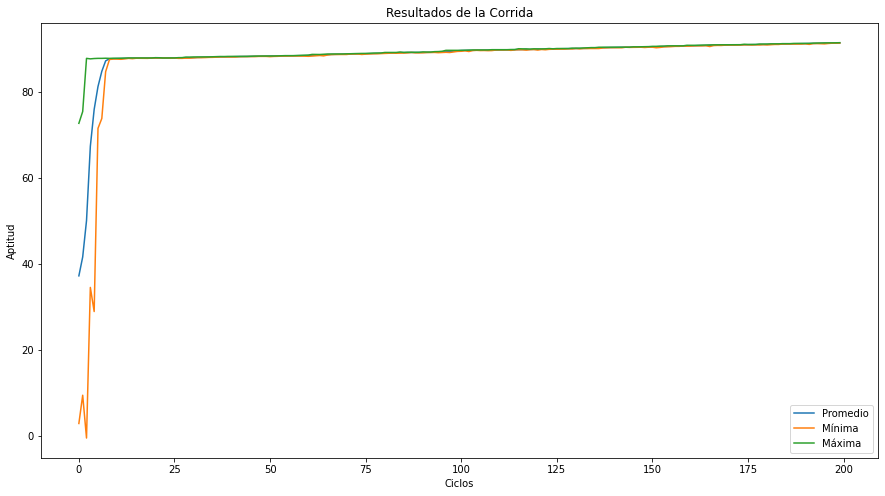

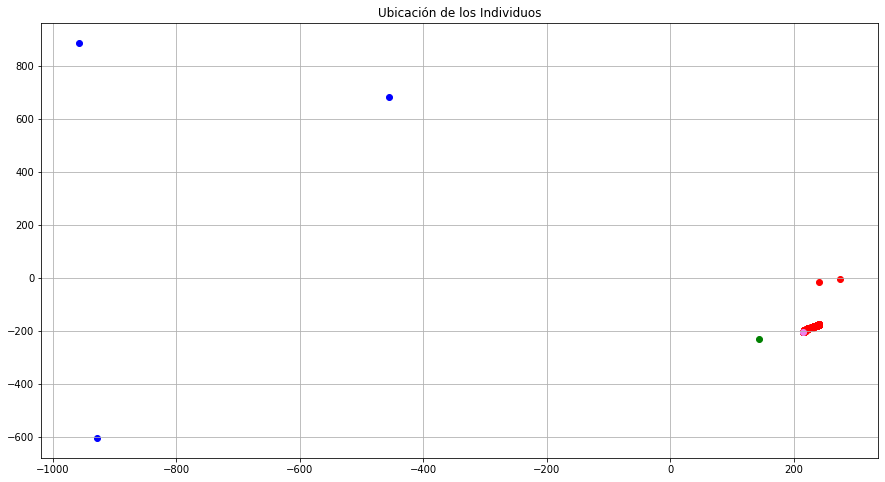

In [0]:
## MOSTRAR GRAFICO DE LA CORRIDA
plt.figure(figsize=(15,8)) 
plt.plot(ciclosPromAptitud)
plt.plot(ciclosMinAptitud)
plt.plot(ciclosMaxAptitud)
plt.title('Resultados de la Corrida')
plt.xlabel('Ciclos')
plt.ylabel('Aptitud')
plt.legend(['Promedio', 'Mínima', 'Máxima'], loc='lower right')
plt.show()


## MOSTRAR GRAFICO DE LA UBICACION DE LOS PUNTOS 
plt.figure(figsize=(15,8)) 

## --en Rojo: posiciones del mejor individuo de cada ciclo
for ind in ciclosMaxIndiv:
  plt.scatter(ind[0], ind[1], color='red')

## -- en Azul: Máximos Locales (positivos)
## -- en Cyan: Mínimos Locales (negativos)
## -- en Verde: Máximo Óptimo
for posi, vali in zip(POS_RANDOM_EVALUAR, VAL_RANDOM_EVALUAR):
  if posi == POS_RANDOM_EVALUAR[POS_RANDOM_EVALUAR_OPTIMO]:
      plt.scatter(posi[0], posi[1], color='green', s=150)
  elif vali < 0:
      plt.scatter(posi[0], posi[1], color='cyan')
  else:
      plt.scatter(posi[0], posi[1], color='blue')

## --en Violeta: Individuo mejor ubicado
plt.scatter(ciclosMaxIndiv[mejorCiclo][0], ciclosMaxIndiv[mejorCiclo][1], color='violet', s=100)

plt.title('Ubicación de los Individuos')
#plt.xlim(MIN_ESPACIO_BUSQ, MAX_ESPACIO_BUSQ)
#plt.ylim(MIN_ESPACIO_BUSQ, MAX_ESPACIO_BUSQ)
plt.grid(True)
plt.show()
